In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# learning algs
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# experimental study
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# statistical tests
import scipy.stats as ss

In [9]:
# Data sets
df1 = pd.read_csv("data/ds1.csv")
df2 = pd.read_csv("data/ds2.csv")
df3 = pd.read_csv("data/ds3.csv")

#2. Defining features and Target
X1 = df1.drop(['Class'], axis=1)
y1 = df1.Class

X2 = df2.drop(['Class'], axis=1)
y2 = df2.Class

X3 = df3.drop(['Class'], axis=1)
y3 = df3.Class

In [10]:
# Learning Alg.
algs = [
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lda', LinearDiscriminantAnalysis()),
    ('gnb', GaussianNB()),
    ('linear_svc', SVC(kernel="linear")),
    ('poly_svc', SVC(kernel="poly")),
    ('rbf_svc', SVC(kernel="rbf"))
]

In [30]:
# Experimental Setup
def run_cv(X,y,algs,nfolds=10):
    
    results = {}
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=42)
    for algo_name, algo in algs:
        results[algo_name] = []
        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            algo.fit(X_train, y_train)
            y_pred = algo.predict(X_test)
            results[algo_name].append(accuracy_score(y_test, y_pred))
        results_df = pd.DataFrame.from_dict(results)
        return results_df

In [31]:
results_ds1 = run_cv(X1,y1,algs)

In [32]:
results_ds2 = run_cv(X2,y2,algs)

In [33]:
results_ds3 = run_cv(X3,y3,algs)

In [34]:
# Plot the results using a box plot
def plot_cv(results_cv,metric='Accuracy'):
    fig, ax = plt.subplots()
    ax.boxplot(results_cv)
    ax.set_xticklabels(results_cv.columns)
    ax.set_ylabel(metric)
    ax.set_title('Cross-validation results for multiple algorithms in a single task')
    plt.show()

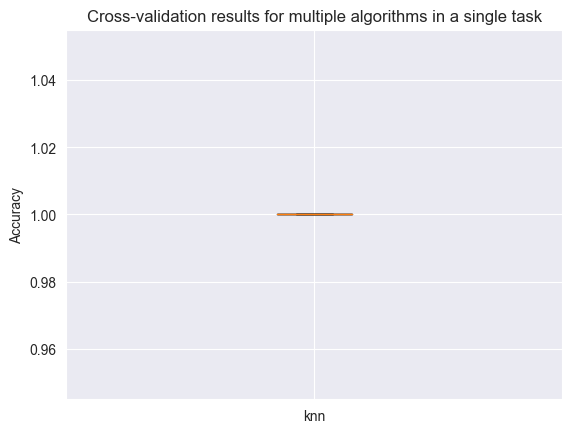

In [35]:
plot_cv(results_ds1)

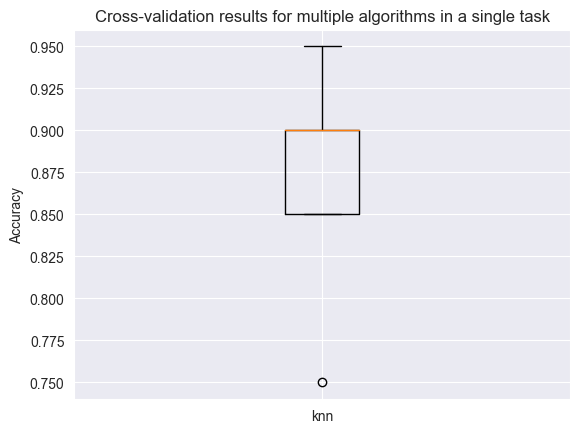

In [36]:
plot_cv(results_ds2)

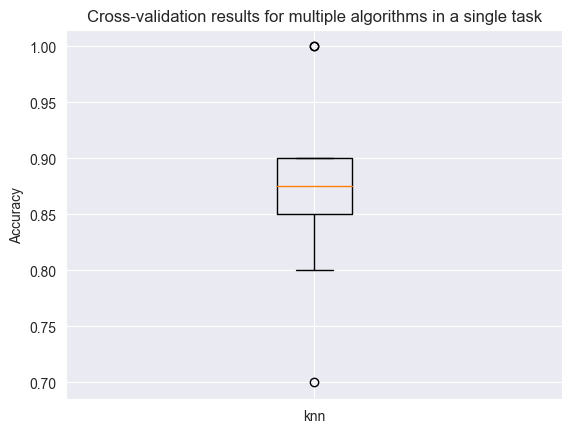

In [37]:
plot_cv(results_ds3)

In [38]:
# Plot the results using a bar plot with error bars
def plot_cv_estimates(results_cv,metric='Accuracy'):
    fig, ax = plt.subplots()
    ax.bar(results_cv.columns, results_cv.mean(),
           yerr=results_cv.std() / np.sqrt(results_cv.shape[0]),
           capsize=5)
    ax.set_ylabel(metric)
    ax.set_title('Cross-validation results for multiple algorithms in a single task')
    plt.show()

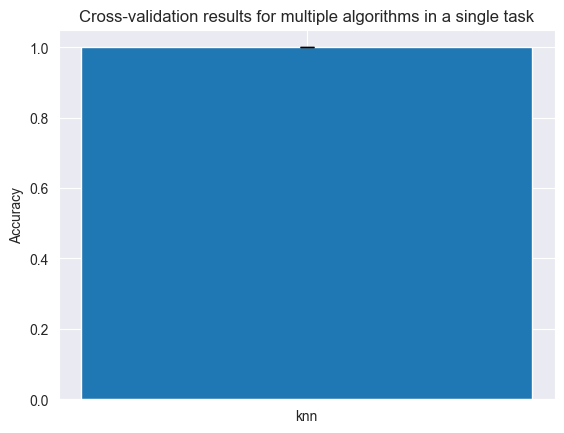

In [39]:
plot_cv_estimates(results_ds1)

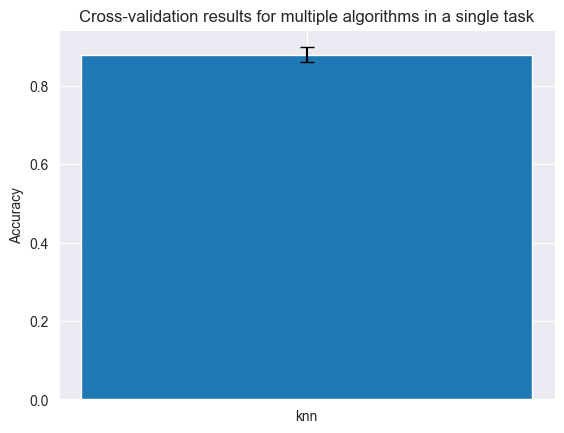

In [40]:
plot_cv_estimates(results_ds2)

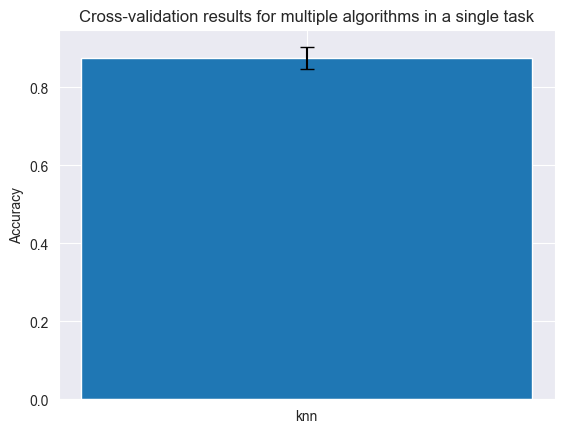

In [41]:
plot_cv_estimates(results_ds3)

In [42]:
# Plot the results using a bar plot with error bars and colors
def plot_cv_stat(results_cv,baseline=None,stat_test="ttest",alpha=0.05,metric)
    if baseline is None:
        baseline=results_cv.columns[0]
        
    baseline_res = results_cv[baseline]

    other_res = results_cv.drop(baseline,axis=1)
    
    fig, ax = plt.subplots()
    ax.bar(baseline,baseline_res.mean(),
           yerr=baseline_res.std() / np.sqrt(baseline_res.shape[0]),
           capsize=5,color="lightblue")
    cols = []
    for alg in other_res:
        # Compute the statistical significance of each algorithm
        if stat_test == 'ttest':
            test_stat, test_p = ss.ttest_rel(other_res[alg], baseline_res)
        elif stat_test == 'wilcoxon':
            test_stat, test_p = ss.wilcoxon(other_res[alg1],baseline_res,metric)
        if test_p < alpha:
            if other_res[alg].mean() > baseline_res.mean():
                cols = cols + ['steelblue']
            else:
                cols = cols + ['darkred']
        else:
            cols = cols + ['lightgrey']
    ax.bar(other_res.columns, other_res.mean(),
           yerr=other_res.std() / np.sqrt(other_res.shape[0]),
           capsize=5,color=cols)
    ax.set_ylabel(metric)
    ax.set_title('Cross-validation results for multiple algorithms in a single task')
    plt.show()

SyntaxError: non-default argument follows default argument (2602511944.py, line 2)

In [43]:
plot_cv_stat(results_ds1,stat_test="ttest")

NameError: name 'plot_cv_stat' is not defined

In [19]:
plot_cv_stat(results_ds2,stat_test="ttest")

NameError: name 'plot_cv_stat' is not defined

In [20]:
plot_cv_stat(results_ds3,stat_test="ttest")

NameError: name 'plot_cv_stat' is not defined

In [21]:
plot_cv_stat(results_ds3,baseline='lda')

NameError: name 'plot_cv_stat' is not defined

In [22]:
results_ds1.to_csv("results_ds1.csv",index=False)
results_ds2.to_csv("results_ds2.csv",index=False)
results_ds3.to_csv("results_ds3.csv",index=False)

NameError: name 'results_ds1' is not defined